In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
import pandas as pd
import pickle
import seaborn as sns
sys.path.insert(0, '..')
import reservoirpy.reservoirpy

In [2]:
method = "rk45"

In [3]:
method = "euler"

In [222]:
test = np.load(f"../notebooks/simulation_data/linked_lorenz10/{method}/test.npy", allow_pickle=True)
N = test[0]["N"]
test = test[0]["data"]

In [223]:
sns.set_style("white")

#### Single reservoir

In [224]:
outputs = np.load(f"../outputs/linked_lorenz/N{N}/pred_single_res_rk45_0075.npy", allow_pickle = True)

In [225]:
outputs.shape

(10000, 30)

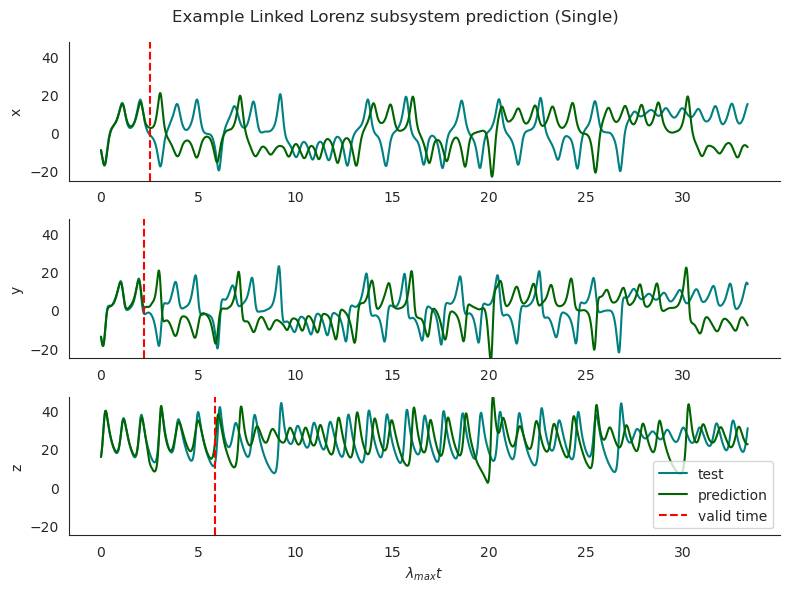

In [226]:
rank = 4
test_len = 3000
start = 0
stop = 3000
threshold = 0.4

fig, axs = plt.subplots(3, 1, figsize=(8, 6))
for i, ax, var in zip([0,1,2], axs, ['x', 'y', 'z']):
    normalisation = np.sqrt(np.average(np.power(abs(test[0:test_len, 3*rank+i]), 2)))
    e = (np.abs(test[0:test_len, 3*rank+i] - outputs[0:test_len, 3*rank+i])) / normalisation

    valid_time = np.where(e > threshold)[0]

    sns.lineplot(data=test[0:test_len, 3*rank+i], ax=ax, color='teal', label="test")
    sns.lineplot(data=outputs[0:test_len, 3*rank+i], ax=ax, color='darkgreen', label="prediction")
    ax.axvline(x=valid_time[0], color='r', linestyle='--', label="valid time")

    lyapunov_time = 90
    ticks = np.arange(0, len(test[start:stop, 3*rank+i]), lyapunov_time)
    # Select every second tick
    ticks_to_show = ticks[::5]
    labels_to_show = np.arange(len(ticks))[::5]
    ax.set_xticks(ticks=ticks_to_show, labels=labels_to_show)
    ax.set_ylim(np.min(test), np.max(test))
    ax.set_ylabel(var)
    ax.get_legend().remove()
    sns.despine()
ax.set_xlabel(r"$\lambda_{max}t$")
plt.suptitle("Example Linked Lorenz subsystem prediction (Single)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("llorenz_example_single1.pdf", format="pdf")

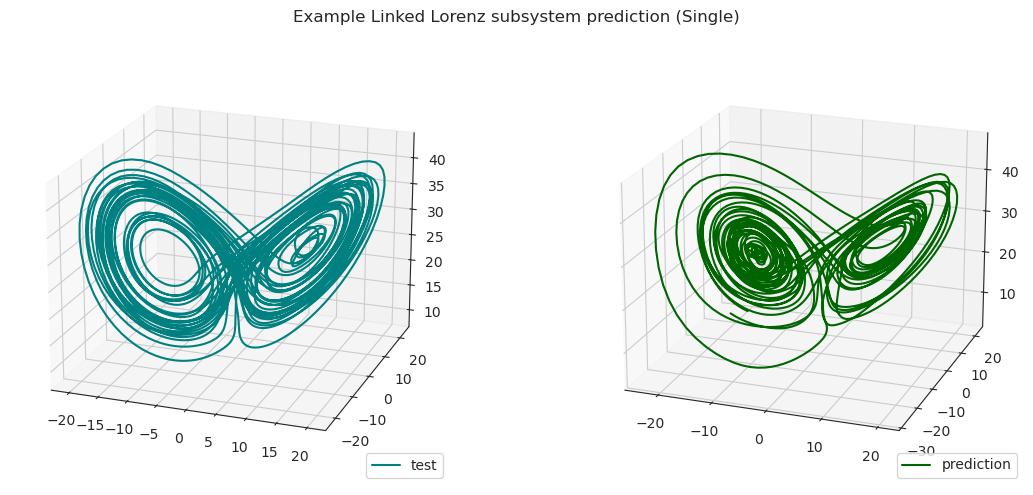

In [227]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
start = 0
stop = 5000
ax[0].plot(test[start:stop, 3*rank], test[start:stop, 3*rank+1], test[start:stop, 3*rank+2], color = "teal", label = "test")
ax[0].view_init(elev=20, azim=290)
ax[1].plot(outputs[start:stop, 3*rank], outputs[start:stop, 3*rank+1], outputs[start:stop, 3*rank+2], color="darkgreen", label="prediction")
ax[1].view_init(elev=20, azim=290)
ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
plt.suptitle("Example Linked Lorenz subsystem prediction (Single)")
plt.tight_layout()
plt.savefig("llorenz_example_single2.pdf", format="pdf")

In [228]:
pred = np.load(f"../outputs/linked_lorenz/N{N}/pred_all_{method}_0075.npy", allow_pickle=True)

In [229]:
pred.shape

(10000, 10, 3)

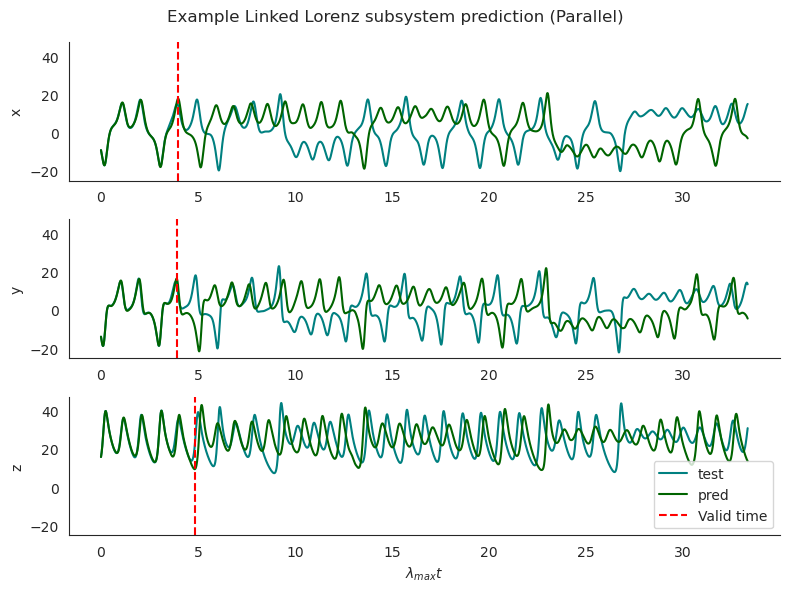

In [232]:
rank = 4
test_len = 3000
start = 0
stop = 3000
threshold = 0.4

fig, axs = plt.subplots(3, 1, figsize=(8, 6))
for i, ax, var in zip([0,1,2], axs, ['x', 'y', 'z']):
    normalisation = np.sqrt(np.average(np.power(abs(test[start:stop, 3*rank+i]), 2)))
    e = (np.abs(test[start:stop, 3*rank+i] - pred[start:stop, rank, i])) / normalisation

    valid_time = np.where(e > threshold)[0]

    sns.lineplot(data=test[start:stop, 3*rank+i], ax=ax, label=r"test", color="teal")
    sns.lineplot(data=pred[start:stop, rank, i], ax=ax, label=r"pred", color="darkgreen")
    ax.axvline(x=valid_time[0], color='r', linestyle='--', label=f'Valid time')

    lyapunov_time = 90
    ticks = np.arange(0, len(test[start:stop, 3*rank+i]), lyapunov_time)
    # Select every second tick
    ticks_to_show = ticks[::5]
    labels_to_show = np.arange(len(ticks))[::5]
    ax.set_xticks(ticks=ticks_to_show, labels=labels_to_show)
    ax.set_ylim(np.min(test), np.max(test))
    ax.set_ylabel(var)
    ax.get_legend().remove()
    sns.despine()
ax.set_xlabel(r"$\lambda_{max}t$")
plt.legend(loc="lower right")
plt.suptitle("Example Linked Lorenz subsystem prediction (Parallel)")
plt.tight_layout()
plt.savefig("llorenz_example_parallel1.pdf", format="pdf")

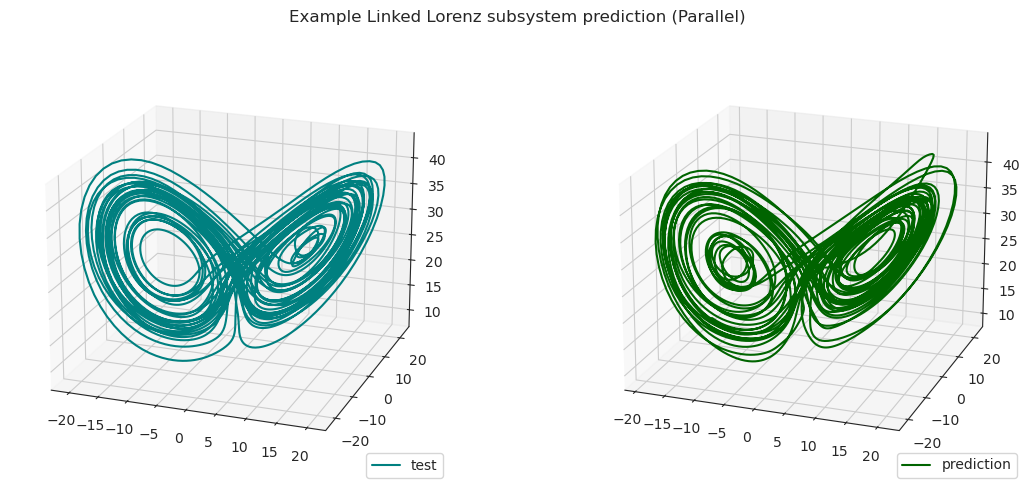

In [231]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
start = 0
stop = 5000
ax[0].plot(test[start:stop, 3*rank], test[start:stop, 3*rank+1], test[start:stop, 3*rank+2], color = "teal", label = "test")
ax[0].view_init(elev=20, azim=290)
ax[1].plot(pred[start:stop, rank, 0], pred[start:stop, rank, 1], pred[start:stop, rank, 2], color="darkgreen", label="prediction")
ax[1].view_init(elev=20, azim=290)
ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
plt.suptitle("Example Linked Lorenz subsystem prediction (Parallel)")
plt.tight_layout()
plt.savefig("llorenz_example_parallel2.pdf", format="pdf")

In [209]:
vt = {"rk45":[], "euler":[]}
lyapunov_time = 90

In [210]:
for m in vt.keys():
    test = np.load(f"../notebooks/simulation_data/linked_lorenz10/{m}/test.npy", allow_pickle=True)
    N = test[0]["N"]
    test = test[0]["data"]
    pred = np.load(f"../outputs/linked_lorenz/N{N}/pred_all_{m}.npy", allow_pickle=True)
    for n in range(N):
        for i in range(3):
                normalisation = np.sqrt(np.average(np.power(abs(test[0:test_len, 3*n+i]), 2)))
                e = (np.abs(test[0:test_len, 3*n+i] - pred[0:test_len, n, i])) / normalisation
                valid_time = np.where(e > threshold)[0]
                vt[m].append(valid_time[0])
        

In [198]:
mean_rk45 = np.mean(vt["rk45"])
median_rk45 = np.median(vt["rk45"])
std_rk45 = np.std(vt["rk45"])
print(f"RK45\nMean: {mean_rk45}\nMedian: {median_rk45}\nSD: {std_rk45}")

RK45
Mean: 35.7
Median: 0.0
SD: 73.78308297525479


In [133]:
mean_euler = np.mean(vt["euler"])
median_euler = np.median(vt["euler"])
std_euler = np.std(vt["euler"])
print(f"Euler\nMean: {mean_euler}\nMedian: {median_euler}\nSD: {std_euler}")

Euler
Mean: 142.88666666666666
Median: 140.5
SD: 119.09226320611913


In [134]:
len(vt["euler"])

300

In [135]:
for m in vt.keys():
    vt[m] = [t / lyapunov_time for t in vt[m]]
df = pd.DataFrame(vt)
df.to_csv(f"../outputs/linked_lorenz/N{N}/dt0_0075/vt.csv", index=False)

## Linked lorenz 10 valid times with different timesteps and ground truth integration methods


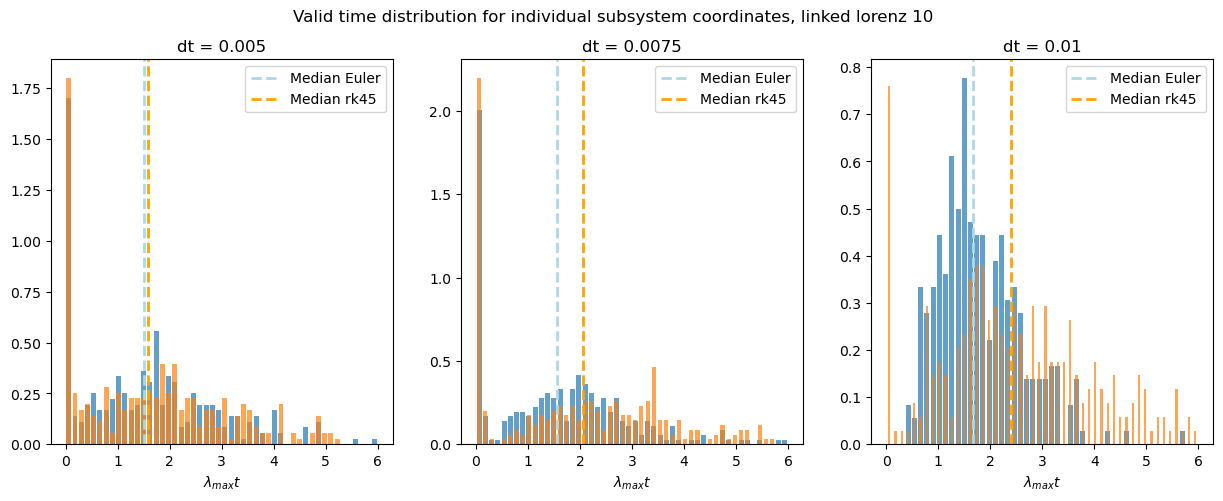

In [2]:
N=10
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle("Valid time distribution for individual subsystem coordinates, linked lorenz 10")

df = pd.read_csv(f"../outputs/linked_lorenz/N{N}/dt0_005/vt.csv")
ax[0].hist(df["euler"], bins = 50, rwidth = 0.8, alpha=0.7, density=True, range=[0,6])
ax[0].hist(df["rk45"], bins = 50, rwidth = 0.8* (np.max(df["euler"]) - np.min(df["euler"])) / (np.max(df["rk45"]) - np.min(df["rk45"])), alpha=0.7, density=True, range=[0,6])
ax[0].set_xlabel(r"$\lambda_{max}t$")
ax[0].set_title("dt = 0.005")
ax[0].axvline(np.median(df["euler"]), color='lightblue', linestyle='dashed', linewidth=2, label='Median Euler')
ax[0].axvline(np.median(df["rk45"]), color='orange', linestyle='dashed', linewidth=2, label='Median rk45')
ax[0].legend()

df = pd.read_csv(f"../outputs/linked_lorenz/N{N}/dt0_0075/vt.csv")
ax[1].hist(df["euler"], bins = 50, rwidth = 0.8, alpha=0.7, density=True, range=[0,6])
ax[1].hist(df["rk45"], bins = 50, rwidth = 0.8* (np.max(df["euler"]) - np.min(df["euler"])) / (np.max(df["rk45"]) - np.min(df["rk45"])), alpha=0.7, density=True, range=[0,6])
ax[1].set_xlabel(r"$\lambda_{max}t$")
ax[1].set_title("dt = 0.0075")
ax[1].axvline(np.median(df["euler"]), color='lightblue', linestyle='dashed', linewidth=2, label='Median Euler')
ax[1].axvline(np.median(df["rk45"]), color='orange', linestyle='dashed', linewidth=2, label='Median rk45')
ax[1].legend()

df = pd.read_csv(f"../outputs/linked_lorenz/N{N}/dt0_01/vt.csv")
ax[2].hist(df["euler"], bins = 50, rwidth = 0.8, alpha=0.7, density=True, range=[0,6])
ax[2].hist(df["rk45"], bins = 50, rwidth = 0.8* (np.max(df["euler"]) - np.min(df["euler"])) / (np.max(df["rk45"]) - np.min(df["rk45"])), alpha=0.7, density=True, range=[0,6])
ax[2].set_xlabel(r"$\lambda_{max}t$")
ax[2].set_title("dt = 0.01")
ax[2].axvline(np.median(df["euler"]), color='lightblue', linestyle='dashed', linewidth=2, label='Median Euler')
ax[2].axvline(np.median(df["rk45"]), color='orange', linestyle='dashed', linewidth=2, label='Median rk45')
ax[2].legend()

In [6]:
fig.savefig("linked_lorenz_dt_vt.pdf", format="pdf")

In [32]:
result_path = "../outputs/linked_lorenz/N10/dt0_0075/vt_single_2.pkl"

with open(result_path, 'rb') as file:
    vt = pickle.load(file)
len(vt)

140

In [21]:
# subsystem valid time distributions
result_path = "../outputs/linked_lorenz/N10/dt0_0075/vt_parallel.pkl"

with open(result_path, 'rb') as file:
    vt_parallel = pickle.load(file)

In [22]:
vt_sub = {"single": [], "parallel":[]}
vt_sub["parallel"] = vt_parallel

In [23]:
for i in range(4):
    result_path = f"../outputs/linked_lorenz/N10/dt0_0075/vt_single_{i}.pkl"
    with open(result_path, 'rb') as file:
        temp = pickle.load(file)
    vt_sub["single"] += temp

In [24]:
print(len(vt_sub["parallel"]))
print(len(vt_sub["single"]))

660
630


In [25]:
lyapunov_time = 90

In [26]:
for m in vt_sub.keys():
    vt_sub[m] = [t / lyapunov_time for t in vt_sub[m]]

In [29]:
for m in vt_sub.keys():
    print(f"mean: {m}:", np.mean(vt_sub[m]))
    print(f"SD: {m}:", np.std(vt_sub[m]))
    

mean: single: 2.243844797178131
SD: single: 1.324967594697953
mean: parallel: 2.5760101010101013
SD: parallel: 1.385533475144936


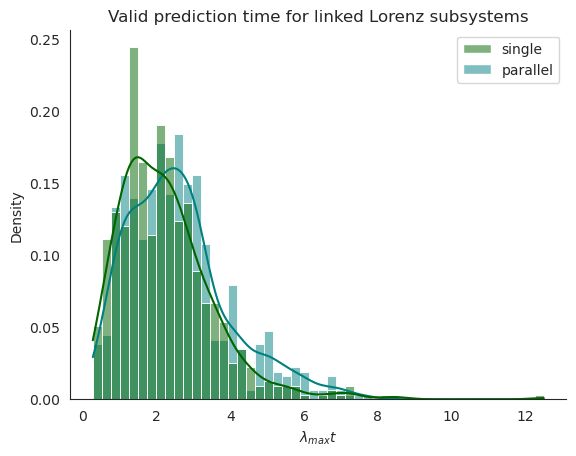

In [27]:
sns.set_style("white")
palette = ["darkgreen", "teal"]
sns.histplot(vt_sub, kde=True, bins=50, palette=sns.color_palette(palette, 2), alpha=0.5, stat="density")
plt.title("Valid prediction time for linked Lorenz subsystems")
plt.xlabel(r"$\lambda_{max}t$")
sns.despine()
plt.savefig("single_vs_parallel_llorenz.pdf", format="pdf")

### Integration method and timestep

In [49]:
# subsystem valid time distributions
result_path = "../outputs/linked_lorenz/N10/dt0_0075/vt_euler.pkl"

with open(result_path, 'rb') as file:
    vt = pickle.load(file)

In [50]:
import random
for i in range(340):
    random_index = random.randrange(len(vt))
    removed_element = vt.pop(random_index)
len(vt)

660

In [52]:
with open(result_path, 'wb') as file:
    pickle.dump(vt, file)

In [43]:
# subsystem valid time distributions
result_path = "../outputs/linked_lorenz/N10/dt0_0075/vt_rk45.pkl"

with open(result_path, 'rb') as file:
    vt = pickle.load(file)
len(vt)

660

Mean 0.005 euler: 2.5079814814814814
SD 0.005 euler: 1.3224261486844096
Mean 0.005 rk45: 3.162777777777778
SD 0.005 rk45: 1.3384633691932528
Mean 0.0075 euler: 1.3942255892255893
SD 0.0075 euler: 0.8053616095262128
Mean 0.0075 rk45: 2.5760101010101013
SD 0.0075 rk45: 1.385533475144936
Mean 0.01 euler: 1.4396588486140725
SD 0.01 euler: 0.7318438986068782
Mean 0.01 rk45: 2.1201492537313436
SD 0.01 rk45: 1.2449846238222246


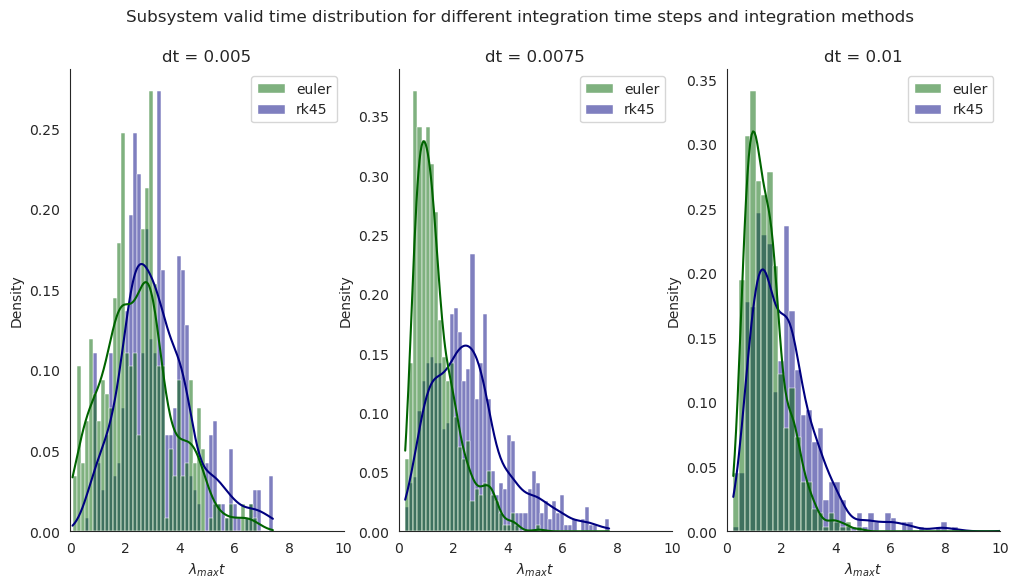

In [53]:
palette = ["darkgreen", "navy"]
sns.set_style("white")
fig, axs = plt.subplots(1,3, figsize=(12,6))
dts = [0.005, 0.0075, 0.01]
#dts = [0.005, 0.01]
vt_dict = {"euler":[], "rk45":[]}
for dt, ax in zip(dts, axs):
    for m in vt_dict.keys():
        with open(f'../outputs/linked_lorenz/N10/dt0_{str(dt)[2:]}/vt_{m}.pkl', 'rb') as f:
            vt = pickle.load(f)
            vt_dict[m] = vt
    
    lyapunov_time = int(0.675/dt)
    
    for m in vt_dict.keys():
        vt_dict[m] = [t / lyapunov_time for t in vt_dict[m]]
            
    for m in vt_dict.keys():
        print(f"Mean {dt} {m}:", np.mean(vt_dict[m]))
        print(f"SD {dt} {m}:", np.std(vt_dict[m]))
    sns.histplot(vt_dict, kde=True, bins=50, palette=sns.color_palette(palette, 2), ax=ax, alpha=0.5, stat="density")
    ax.set_title(f"dt = {dt}")
    ax.set_xlabel(r"$\lambda_{max}t$")
    ax.set_xlim(0,10)
    sns.despine()
plt.suptitle("Subsystem valid time distribution for different integration time steps and integration methods")
plt.savefig("llorenz_dt_test_sub.pdf",format="pdf")